# Задача 2
## Численное дифференцирование

### Определение классов

In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', size=20)

In [2]:
# создаём класс для нахождения производной по (7) формуле

class DerivativeNumMain:
    # конструктор
    def __init__(self, f, h):
        self.f = f
        self.h = h
        
    # задаём коэффициенты альфа    
    def SetAlpha(self, alpha):
        self._alpha = alpha
    
    # метод вызова
    def __call__(self, x):
        f, h, alpha = self.f, self.h, self._alpha
        res = 0
        
        for i in range(len(alpha)):
            
            res = res + alpha[i] * (f(x + (i + 1) * h) - f(x - (i + 1) * h)) / h
            
        return res

In [3]:
# Это тестовый блок с хорошо известной функцией

h0 = 1e-4
x_0 = 5.
TestFunction = lambda x: x ** 2

# Задаём коэффициенты для формулы (6)

alpha = list()
alpha.append(3. / 4)
alpha.append(-3. / 20)
alpha.append(1. / 60)

der = DerivativeNumMain(TestFunction, h0)
der.SetAlpha(alpha)
print('der1: ' + str(der(x_0)))

# Задаём коэффициенты для формулы (5)

alpha2 = list()
alpha2.append(2. / 3)
alpha2.append(-1. / 12)

der2 = DerivativeNumMain(TestFunction, h0)
der2.SetAlpha(alpha2)
print('der2: ' + str(der2(x_0)))

# Задаём коэффициенты для формулы (4)

alpha3 = list()
alpha3.append(1. / 2)

der3 = DerivativeNumMain(TestFunction, h0)
der3.SetAlpha(alpha3)
print('der3: ' + str(der3(x_0)))

alphas = list()
alphas.append(alpha)
alphas.append(alpha2)
alphas.append(alpha3)

der1: 9.99999999995
der2: 9.99999999996
der3: 9.99999999998


In [4]:
# Теперь создаём классы для формул (2) - (6)

class DerivativeNum2(DerivativeNumMain):
    
    # переопределяем метод вызова
    def __call__(self, x):
        f, h = self.f, self.h
        
        return (f(x + h) - f(x)) / h

In [5]:
der4 = DerivativeNum2(TestFunction, h0)
print('der4: ' + str(der4(x_0)))

der4: 10.0001


In [6]:
class DerivativeNum3(DerivativeNumMain):
    
    # переопределяем метод вызова
    def __call__(self, x):
        f, h = self.f, self.h
        
        return (f(x) - f(x - h)) / h

In [7]:
der5 = DerivativeNum3(TestFunction, h0)
print('der5: ' + str(der5(x_0)))

der5: 9.99989999997


In [8]:
class DerivativeNum4(DerivativeNumMain):
    
    # переопределяем метод вызова
    def __call__(self, x):
        f, h = self.f, self.h
        
        return (f(x + h) - f(x - h)) / (2 * h)

In [9]:
der6 = DerivativeNum4(TestFunction, h0)
print('der6: ' + str(der6(x_0)))

der6: 9.99999999998


In [10]:
class DerivativeNum5(DerivativeNumMain):
    
    # переопределяем метод вызова
    def __call__(self, x):
        f, h = self.f, self.h
        
        return 4 * (f(x + h) - f(x - h)) / (6 * h) - (f(x + 2 * h) - f(x - 2 * h)) / (12 * h)

In [11]:
der7 = DerivativeNum5(TestFunction, h0)
print('der7: ' + str(der7(x_0)))

der7: 9.99999999996


In [12]:
class DerivativeNum6(DerivativeNumMain):
    
    # переопределяем метод вызова
    def __call__(self, x):
        f, h = self.f, self.h
        
        return 3 * (f(x + h) - f(x - h)) / (4 * h) - 3 * (f(x + 2 * h) - f(x - 2 * h)) / (20 * h) + (f(x + 3 * h) - f(x - 3 * h)) / (60 * h)

In [13]:
der8 = DerivativeNum6(TestFunction, h0)
print('der8: ' + str(der8(x_0)))

der8: 9.99999999995


### Использование классов

In [14]:
import sympy as smp
xSym = smp.Symbol('x')

# код для отображения формул в формате LaTex
smp.init_printing(use_latex='mathjax')
import IPython.display as ipy

In [15]:
# Задаём символьное представление функций
functionsSym = [smp.sin(xSym ** 2), smp.cos(smp.sin(xSym)), 
               smp.exp(smp.sin(smp.cos(xSym))), smp.ln(xSym + 3),
               smp.sqrt(xSym + 3)]

# Генерируем "обычные" функции из символьных
functions = [smp.lambdify(xSym, f) for f in functionsSym]

In [16]:
derivativesNum = list()

for f in functions:
    derivativesNum.append(DerivativeNum6(f, h0))
    
ipy.display(functionsSym)

⎡   ⎛ 2⎞                sin(cos(x))                _______⎤
⎣sin⎝x ⎠, cos(sin(x)), ℯ           , log(x + 3), ╲╱ x + 3 ⎦

#### Построение графиков численных производных:

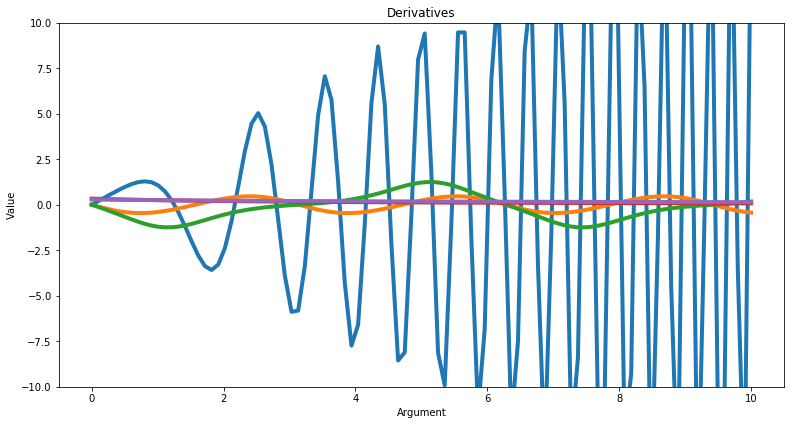

In [17]:
xLeft, xRight = 0., 10.
numPoints = 100
xData = np.linspace(xLeft, xRight, numPoints)
yDatas = []


figureSizeConst = (13, 6.7) 
plt.figure(figsize=figureSizeConst)
plt.title('Derivatives')

for derivativeNum in derivativesNum:   
    yData = derivativeNum(xData)
    
    plt.plot(xData, yData, '-', linewidth = 4)

plt.xlabel('Argument')
plt.ylabel('Value')
plt.ylim([-10., 10.])
plt.show()

#### Анализ сходимости:

In [18]:
derivativesAnalyticalSym = [smp.diff(f, xSym) for f in functionsSym]

derivativesAnalytical = [smp.lambdify(xSym, f) \
                        for f in derivativesAnalyticalSym]

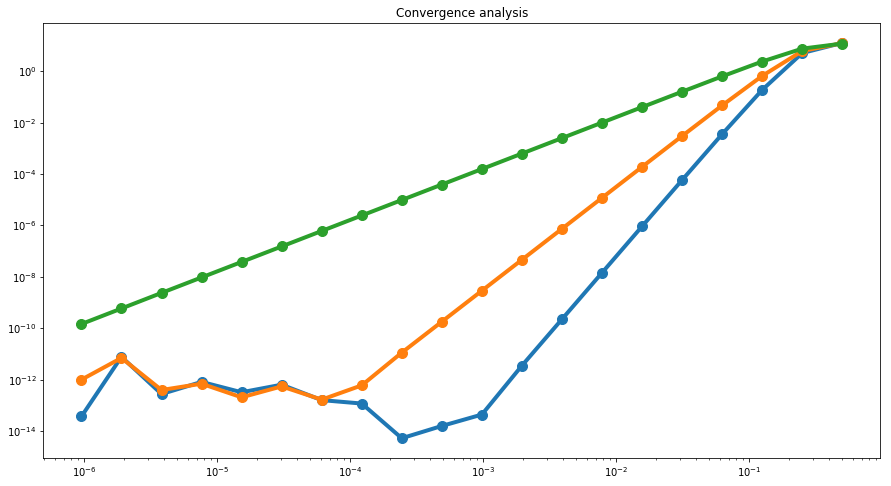

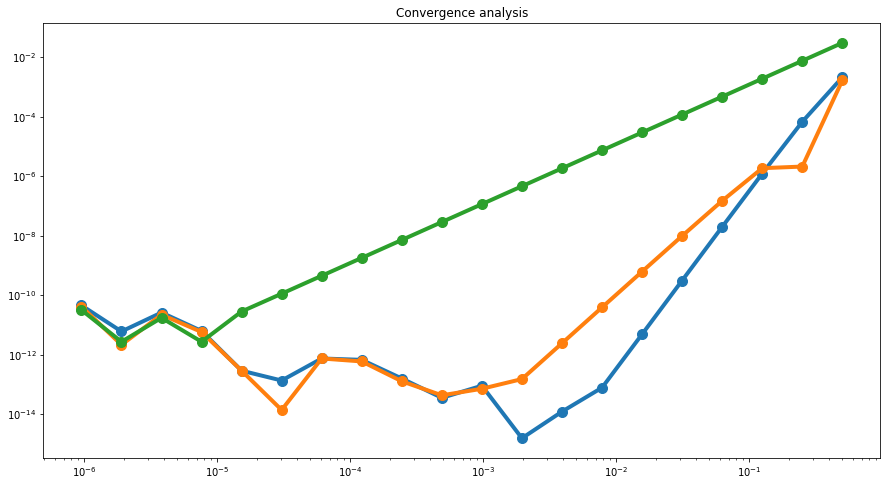

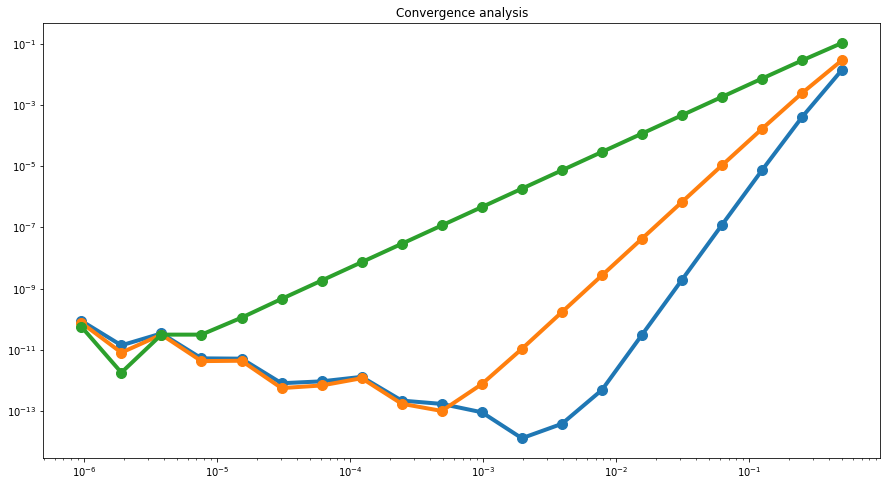

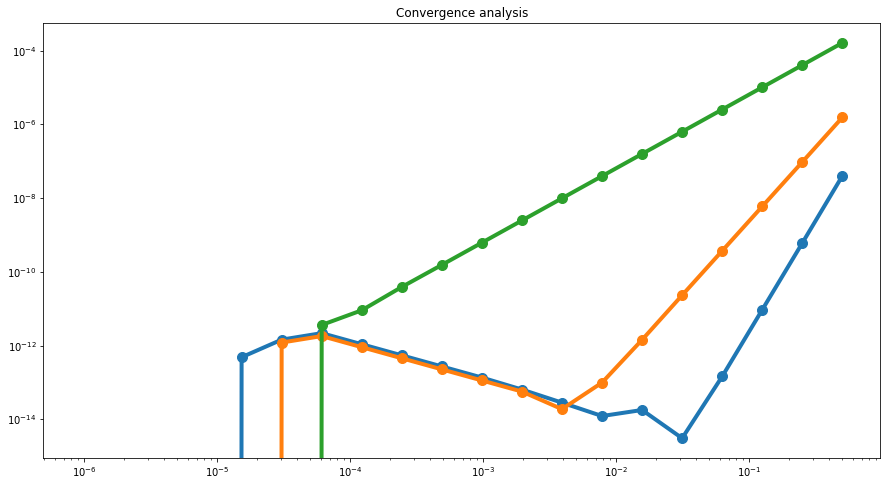

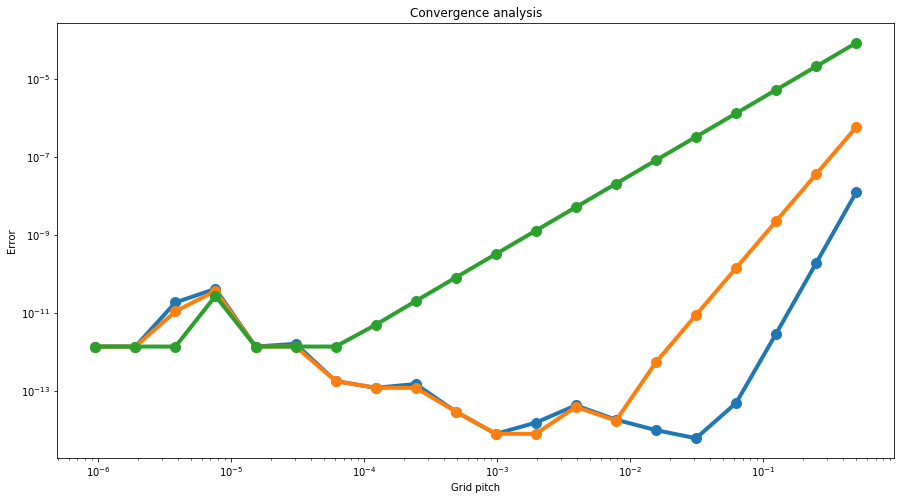

In [20]:
steps = [2**(-n) for n in range(1, 21)]

for f, derivativeAnalytical in zip(functions, derivativesAnalytical):
        
        plt.figure(figsize = (15, 8))
        plt.title('Convergence analysis')
        
        for i in range(3):
            errors = []
            for h in steps:
                derivativeNum = DerivativeNumMain(f, h)
                derivativeNum.SetAlpha(alphas[i])
                error = m.fabs(derivativeNum(x_0) - derivativeAnalytical(x_0))
                errors.append(error)

            plt.loglog(steps, errors, '-o', linewidth=4, markersize=10)


plt.xlabel('Grid pitch')
plt.ylabel('Error')
plt.show()